In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import cv2

import torch
from torchsummary import summary
from torchvision import transforms
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
import sklearn

from tqdm import tqdm

In [2]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns   
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [5]:
cd drive/MyDrive/Colab_Notebooks/

/content/drive/MyDrive/Colab_Notebooks


In [47]:
data = pd.read_csv('./star_classification.csv')
data.head(15)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [7]:
data.shape

(100000, 18)

In [8]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 18)


In [9]:
data.count()

obj_ID         100000
alpha          100000
delta          100000
u              100000
g              100000
r              100000
i              100000
z              100000
run_ID         100000
rerun_ID       100000
cam_col        100000
field_ID       100000
spec_obj_ID    100000
class          100000
redshift       100000
plate          100000
MJD            100000
fiber_ID       100000
dtype: int64

In [10]:
print(data.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [11]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [12]:
data.describe(include=['O']) 

,class
count,100000
unique,3
top,GALAXY
freq,59445


<ipython-input-13-06f81467c92d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


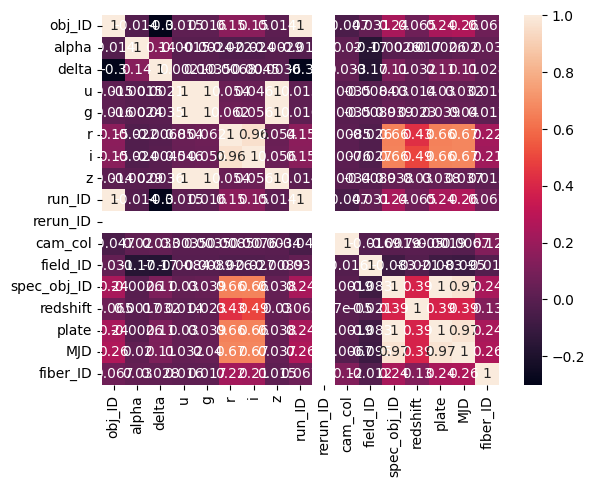

In [13]:
sns.heatmap(data.corr(), annot=True);

In [14]:
df = data.drop(['u','g','run_ID','MJD','plate', 'i', 'rerun_ID'],axis=1)

<ipython-input-15-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

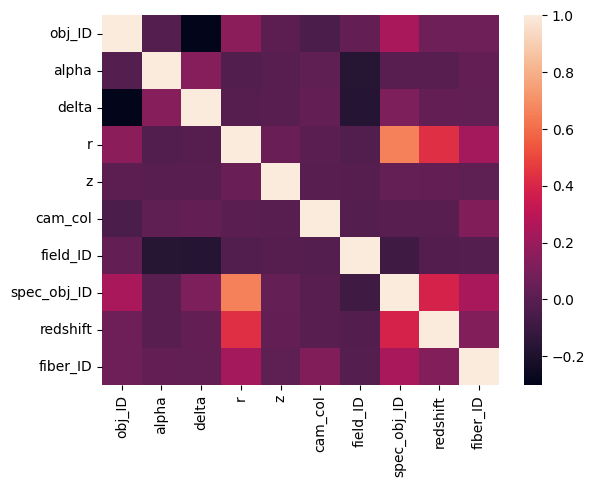

In [15]:
sns.heatmap(df.corr())

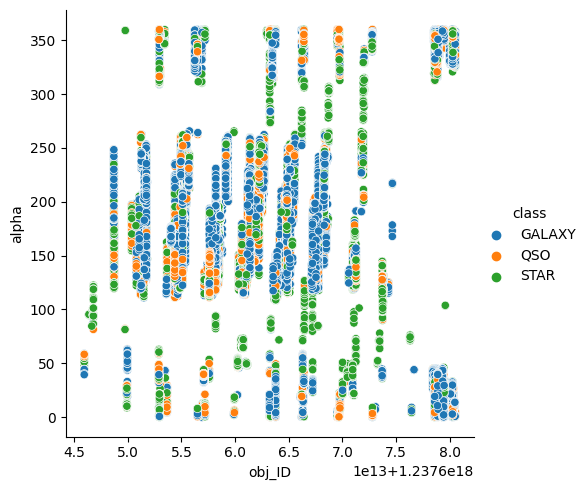

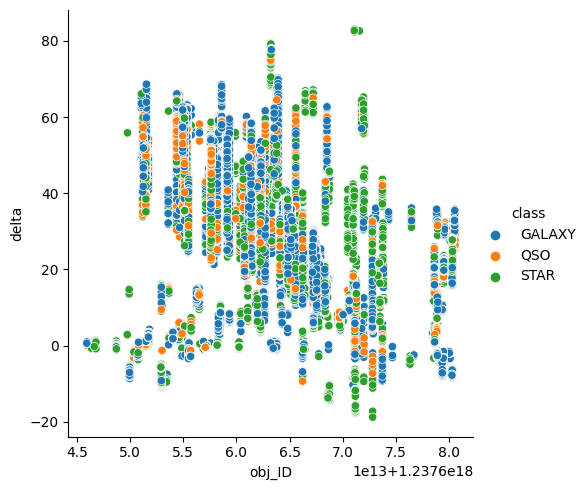

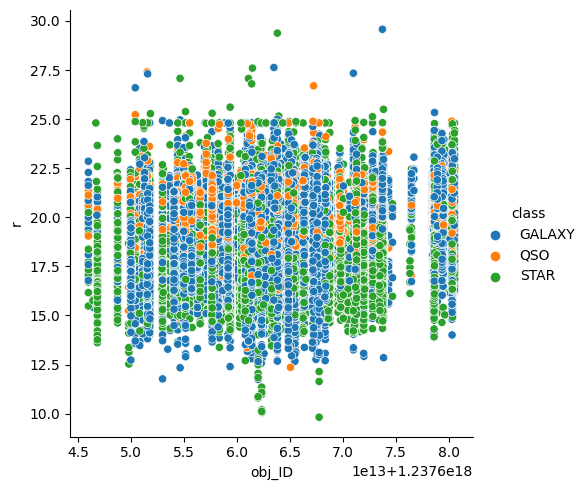

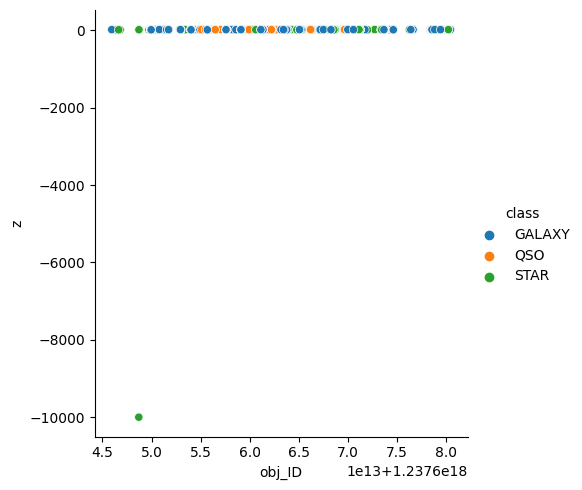

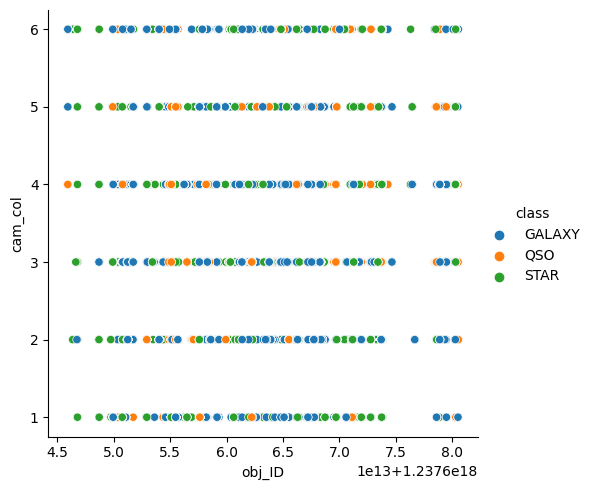

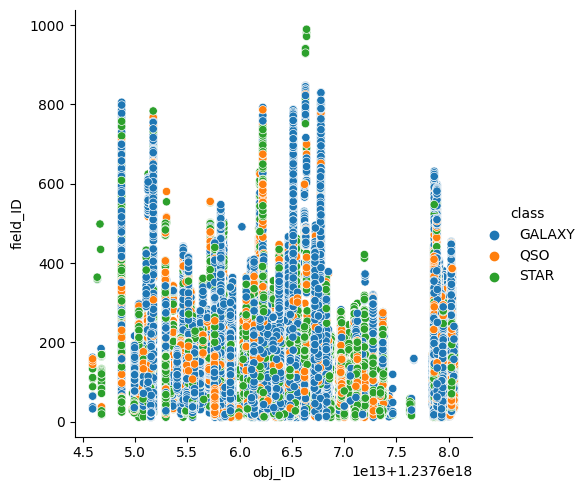

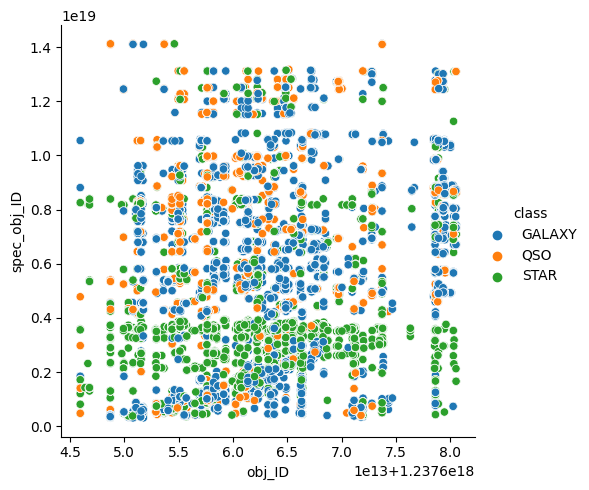

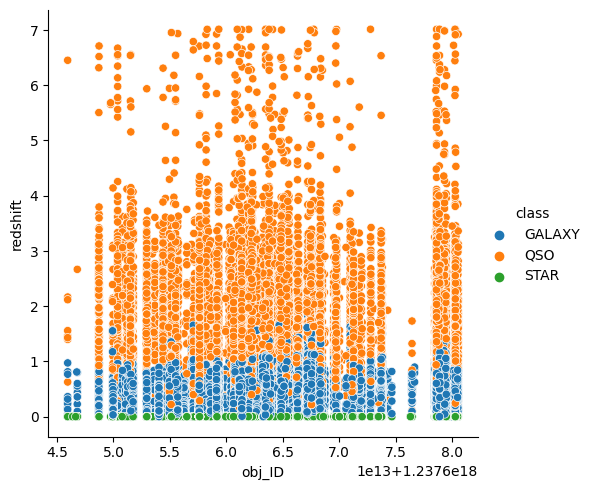

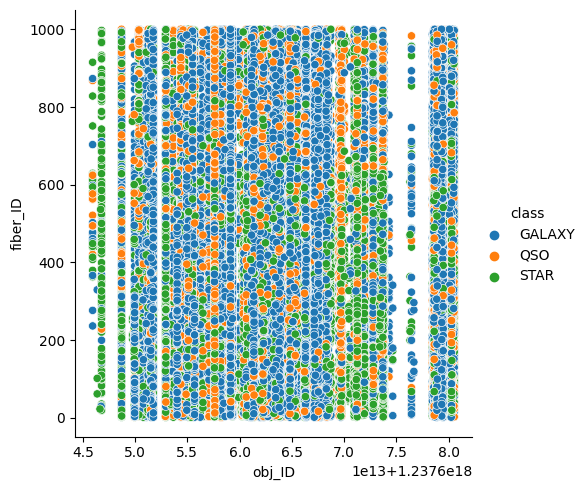

In [16]:
#comparing variations of different attributes with 'obj_ID'
plots=[]
for i in ['alpha', 'delta', 'r', 'z', 'cam_col',
    'field_ID', 'spec_obj_ID', 'redshift', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g);

In [17]:
df = df.drop('cam_col', axis=1)

<Axes: xlabel='z'>

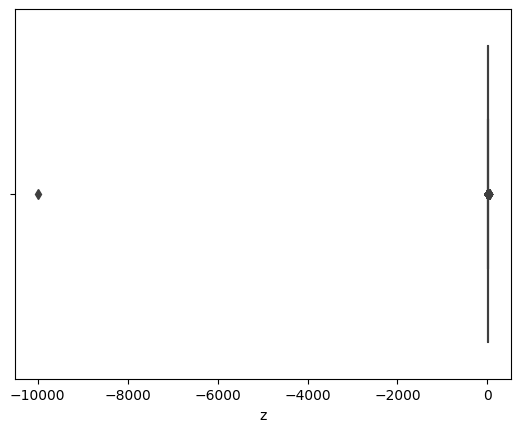

In [18]:
sns.boxplot(x=df.z)

In [19]:
df=df[df.z>-8000]

<Axes: xlabel='z'>

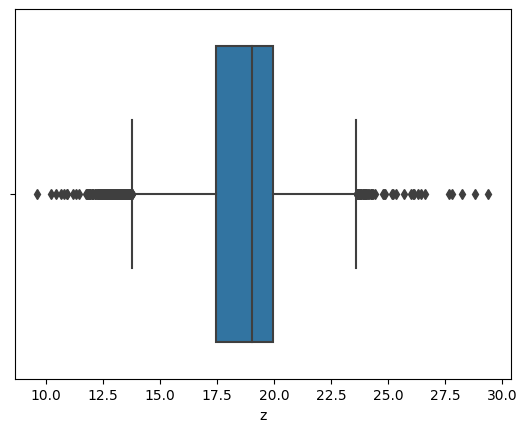

In [20]:
sns.boxplot(x=df.z)

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

obj_ID         9.189091e+12
alpha          1.063773e+02
delta          3.475411e+01
r              2.908995e+00
z              2.460290e+00
field_ID       1.590000e+02
spec_obj_ID    5.488228e+18
redshift       6.496504e-01
fiber_ID       4.240000e+02
dtype: float64


<ipython-input-21-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-21-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [22]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

<ipython-input-22-68777647d4c7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(85650, 10)

In [23]:
finale_data = df1.copy()
finale_data.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,class,redshift,fiber_ID
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,79,6.543777e+18,GALAXY,0.634794,171
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,119,1.176014e+19,GALAXY,0.779136,427
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,120,5.152200e+18,GALAXY,0.644195,299
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,214,1.030107e+19,GALAXY,0.932346,775
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,137,6.891865e+18,GALAXY,0.116123,842


In [24]:
from sklearn import preprocessing

In [25]:
finale_data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [26]:
y = finale_data["class"].map(
{'GALAXY':0,'QSO':1,'STAR':2}).astype(int)
print(y,'\nShape: ',y.shape)
X = finale_data.drop(["class", "obj_ID", 'alpha', 'delta', 'r', 'field_ID', 'spec_obj_ID', 'fiber_ID'], axis=1)
print(X,'\nShape: ',X.shape)

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 85650, dtype: int64 
Shape:  (85650,)
              z  redshift
0      18.79371  0.634794
1      21.61427  0.779136
2      18.94827  0.644195
3      19.25010  0.932346
4      15.54461  0.116123
...         ...       ...
99994  19.05790  0.175206
99996  19.41526  0.404895
99997  17.35221  0.143366
99998  18.62482  0.455040
99999  19.28075  0.542944

[85650 rows x 2 columns] 
Shape:  (85650, 2)


In [27]:
scaler = preprocessing.MinMaxScaler()

names = X.columns
d = scaler.fit_transform(X)

X = pd.DataFrame(d, columns=names)
X.head()

,z,redshift
0,0.510806,0.381833
1,0.797847,0.467314
2,0.526535,0.387401
3,0.557252,0.558045
4,0.180154,0.074673


In [ ]:
train_labels=[train_dataset[i][1] for i in range(len(train_dataset))]
train_labels = np.array(train_labels)
_, counts = np.unique(train_labels, return_counts=True)

In [ ]:
from torch.utils.data import WeightedRandomSampler
samples_weight = [counts / counts.sum()]
samples_weight = torch.tensor(*np.array(samples_weight))
sw = samples_weight[train_labels]
sampler = WeightedRandomSampler(sw, len(sw))
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=False, sampler=sampler)

In [27]:
# s = pd.Series(finale_data['class'])
# pd.get_dummies(s)

In [28]:
# finale_data['GALAXY', 'QSO', 'STAR'] = s

In [29]:
# uncategoring_prekol = {"class": {"GALAXY": 1, "QSO": 2, "STAR": 3}}
# finale_data = finale_data.replace(uncategoring_prekol)
# finale_data.head()

In [30]:
# y = pd.DataFrame(data = [finale_data.columns == ['0', '1', '2']])
# y = finale_data.pop('class')

In [32]:
# X = scaled_df.drop('obj_ID', axis=1)
# X_backup = X.copy()

# fields_to_drop = ['alpha', 'delta', 'r', 'field_ID', 'spec_obj_ID', 'fiber_ID']
# X.drop(fields_to_drop, axis=1, inplace = True)

In [28]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from seaborn import heatmap
from torch.utils.data import DataLoader

In [34]:
# encoder = OneHotEncoder(handle_unknown='ignore')
# encoder_df = pd.DataFrame(encoder.fit_transform(y).toarray())
# y = df.join(encoder_df)

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=42)

In [36]:
# X_train, X_validation, y_train, y_validation = train_test_split(
#     X_train, y_train, test_size=0.17, random_state=42) # 0.17 x 0.85 = 0.1445

<Axes: >

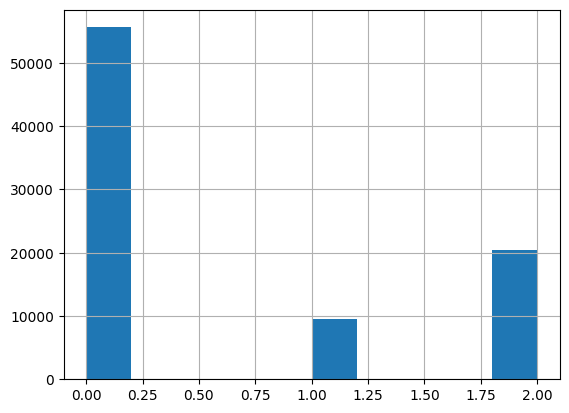

In [29]:
y.hist()
# y_train

In [ ]:
# y_validation.hist()

In [ ]:
# y_test.hist()

In [30]:
class Dataset():
    def __init__(self, df,y):
        self.df = df
        self.y = y

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = self.df.iloc[idx]
        label = self.y.iloc[idx]
        image = torch.from_numpy(image.values).type(torch.float)
        # label = torch.from_numpy(label.values).type(torch.float)
        return image, label
# batch_size = 64
# train_dataloader = DataLoader(Dataset(X_train, y_train), batch_size=batch_size, shuffle=True)
# val_dataloader = DataLoader(Dataset(X_validation, y_validation), batch_size=batch_size, shuffle=True)
# test_dataloader = DataLoader(Dataset(X_test, y_test), batch_size=batch_size, shuffle=True)

In [31]:
class Net(nn.Module):
    def __init__(self,in_parameter,out_parameter):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_parameter,64),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 32),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm1d(32),
            nn.Linear(32, 16),
            nn.LeakyReLU(inplace=True),
            nn.Linear(16, out_parameter),
        )

    def forward(self, x):
        # logits = self.linear_relu_stack(x)
        # softmax = nn.Softmax(dim=1)
        # pred_probab = softmax(logits)
        pred_probab = self.linear_relu_stack(x)
        return pred_probab
##########
# class Net(nn.Module):
#     def __init__(self,in_parameter,out_parameter):
#         super().__init__()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(in_parameter,128),
#             nn.LeakyReLU(inplace=True),
#             nn.BatchNorm1d(128),
#             nn.Linear(128, out_parameter)
#         )

#     def forward(self, x):
#         # logits = self.linear_relu_stack(x)
#         # softmax = nn.Softmax(dim=1)
#         # pred_probab = softmax(logits)
#         pred_probab = self.linear_relu_stack(x)
#         return pred_probab

##########
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(NeuralNetwork, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(input_size, hidden_size),
#             nn.ReLU(),
#             nn.Dropout(p=0.2),
#             nn.Linear(hidden_size, 3),
#         )
#     def forward(self, x):
#         return self.model(x)

# input_size = X.shape[1]
# hidden_size = int(input_size * 2)
# out_size = y.nunique()
# print(input_size, out_size)


In [32]:
from torchsummary import summary
model = Net(in_parameter = 2, out_parameter = 3)

In [68]:
from torch import nn, optim
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [69]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [70]:
dataset = Dataset(df = X,y = y)
img, label = dataset.__getitem__(0)
print(img)
print(label)

tensor([0.5108, 0.3818])
0


In [71]:
from torch.utils.data import random_split

In [72]:
train_count = int(0.9*len(dataset))
test_count = len(dataset)-train_count
train_set, test_set = random_split(dataset, [train_count, test_count])

train_size = int(0.9*train_count)
val_size = train_count-train_size
train_set, val_set = random_split(train_set, [train_size, val_size])

print('dataset len: ', df.__len__())
print('train set: ', train_set.__len__())
print('val set: ', val_set.__len__())
print('test set: ', test_set.__len__())

dataset len:  99999
train set:  69376
val set:  7709
test set:  8565


In [73]:
train_labels=[train_set[i][1] for i in range(len(train_set))]
train_labels = np.array(train_labels)
_, counts = np.unique(train_labels, return_counts=True)

In [74]:
import torch
import numpy as np
from torch.utils.data import WeightedRandomSampler
samples_weight = [counts / counts.sum()]
samples_weight = torch.tensor(*np.array(samples_weight))
sw = samples_weight[train_labels]
sampler = WeightedRandomSampler(sw, len(sw))

In [75]:
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False, sampler = sampler)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [76]:
train_losses=[]
train_acc=[]
def train(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.train()
    running_loss=0
    correct=0
    total=0
    for data in tqdm(train_loader):
        inputs,labels=data[0],data[1]
        labels = labels.type(torch.LongTensor)
        labels = labels
        labels = labels.squeeze()
        optimizer.zero_grad()
        outputs=model(inputs)
        outputs.squeeze
        loss=loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    train_loss=running_loss/len(train_loader)
    acc=100.*correct/total
    train_acc.append(acc)
    train_losses.append(train_loss)
    print('Train Loss per epoch: %.4f | Train Accuracy per epoch: %.4f'%(train_loss,acc))

In [77]:
val_losses=[]
val_acc=[]
def test(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval()
    running_loss=0
    correct=0
    total=0
    with torch.no_grad():
        for data in tqdm(test_loader):
            
            inputs,labels=data[0].to(device),data[1].to(device)
            labels = labels.type(torch.LongTensor)
            labels = labels.to(device)
            labels = labels.squeeze()
            outputs=model(inputs)
            outputs.squeeze
            loss=loss_fn(outputs,labels)

            running_loss += loss.item()

            _, predicted = outputs.max(1)
            
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        val_loss=running_loss/len(train_loader)
        acc=100.*correct/total
        val_acc.append(acc)
        val_losses.append(val_loss)
        print('Val Loss per epoch: %.4f | Val Accuracy per epoch: %.4f'%(val_loss,acc))

In [78]:
max_epochs=10
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    test(model,epoch)


Epoch : 1


100%|██████████| 1084/1084 [00:09<00:00, 117.03it/s]


Train Loss per epoch: 0.0922 | Train Accuracy per epoch: 97.3982

Epoch : 1


100%|██████████| 134/134 [00:00<00:00, 188.25it/s]


Val Loss per epoch: 0.0300 | Val Accuracy per epoch: 92.7029

Epoch : 2


100%|██████████| 1084/1084 [00:09<00:00, 114.67it/s]


Train Loss per epoch: 0.0901 | Train Accuracy per epoch: 97.4617

Epoch : 2


100%|██████████| 134/134 [00:00<00:00, 186.91it/s]


Val Loss per epoch: 0.0320 | Val Accuracy per epoch: 91.6637

Epoch : 3


100%|██████████| 1084/1084 [00:07<00:00, 144.45it/s]


Train Loss per epoch: 0.0888 | Train Accuracy per epoch: 97.4559

Epoch : 3


100%|██████████| 134/134 [00:00<00:00, 203.63it/s]


Val Loss per epoch: 0.0292 | Val Accuracy per epoch: 93.1699

Epoch : 4


100%|██████████| 1084/1084 [00:10<00:00, 107.05it/s]


Train Loss per epoch: 0.0918 | Train Accuracy per epoch: 97.4256

Epoch : 4


100%|██████████| 134/134 [00:00<00:00, 189.93it/s]


Val Loss per epoch: 0.0299 | Val Accuracy per epoch: 92.8546

Epoch : 5


100%|██████████| 1084/1084 [00:09<00:00, 118.05it/s]


Train Loss per epoch: 0.0897 | Train Accuracy per epoch: 97.5020

Epoch : 5


100%|██████████| 134/134 [00:00<00:00, 181.82it/s]


Val Loss per epoch: 0.0258 | Val Accuracy per epoch: 94.0339

Epoch : 6


100%|██████████| 1084/1084 [00:07<00:00, 136.95it/s]


Train Loss per epoch: 0.0912 | Train Accuracy per epoch: 97.4386

Epoch : 6


100%|██████████| 134/134 [00:00<00:00, 164.25it/s]


Val Loss per epoch: 0.0301 | Val Accuracy per epoch: 92.6795

Epoch : 7


100%|██████████| 1084/1084 [00:09<00:00, 117.95it/s]


Train Loss per epoch: 0.0912 | Train Accuracy per epoch: 97.4645

Epoch : 7


100%|██████████| 134/134 [00:00<00:00, 188.53it/s]


Val Loss per epoch: 0.0265 | Val Accuracy per epoch: 93.6252

Epoch : 8


100%|██████████| 1084/1084 [00:09<00:00, 115.67it/s]


Train Loss per epoch: 0.0929 | Train Accuracy per epoch: 97.3636

Epoch : 8


100%|██████████| 134/134 [00:00<00:00, 198.78it/s]


Val Loss per epoch: 0.0279 | Val Accuracy per epoch: 93.6019

Epoch : 9


100%|██████████| 1084/1084 [00:08<00:00, 131.07it/s]


Train Loss per epoch: 0.0902 | Train Accuracy per epoch: 97.4602

Epoch : 9


100%|██████████| 134/134 [00:00<00:00, 135.89it/s]


Val Loss per epoch: 0.0289 | Val Accuracy per epoch: 93.5318

Epoch : 10


100%|██████████| 1084/1084 [00:10<00:00, 106.10it/s]


Train Loss per epoch: 0.0883 | Train Accuracy per epoch: 97.4847

Epoch : 10


100%|██████████| 134/134 [00:00<00:00, 194.79it/s]

Val Loss per epoch: 0.0281 | Val Accuracy per epoch: 93.6252


In [79]:
classes = ('GALAXY','QSO','STAR')
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in tqdm(test_loader):
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # собираем правильные прогнозы для каждого класса
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Выводим точность на каждом классе
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print('\n', f'Accuracy for class: {classname:6s} is {accuracy:.1f} %')

100%|██████████| 134/134 [00:00<00:00, 172.21it/s]


 Accuracy for class: GALAXY is 99.0 %

 Accuracy for class: QSO    is 49.1 %

 Accuracy for class: STAR   is 100.0 %


In [80]:
# !pip install torchsummary --user

In [59]:
# finale_data.shape

In [60]:
# from torchsummary import summary
# summary(model, (85650, 2))

In [61]:
# epochs = 50
# lr = 0.0005
# criterion = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [62]:
# def progress_bar(progress, total, lenght):
#     percent = lenght * (progress / total)
#     bar = "❚" * int(percent) + " " * (lenght - int(percent))
#     return bar

In [ ]:
# for epoch in range(epochs):
#     train_loss = 0
#     val_loss = 0
#     train_correct = 0
#     val_correct = 0
#     for x, y in train_dataloader:
#         optimizer.zero_grad(set_to_none=True)
#         x, y = x.to(device).float(), y.to(device).float().unsqueeze(1)
#         output = model(x)
#         loss = criterion(output, y)
#         train_loss += criterion(output, y).item()
#         train_correct += (y == torch.round(torch.sigmoid(model(x)))).float().sum()
#         model.train()
#         loss.backward()
#         optimizer.step()
#     with torch.no_grad():
#         for x_val, y_val in val_dataloader:
#             x_val, y_val = x_val.to(device).float(), y_val.to(device).float().unsqueeze(1)
#             pred = model(x_val)
#             loss = criterion(pred, y_val)
#             val_loss += criterion(pred, y_val).item()
#             val_correct += (y_val == torch.round(torch.sigmoid(model(x_val)))).float().sum()      
#     print(f"{progress_bar(epoch + 1, epochs, 100)}| {epoch + 1} / {epochs}, train_loss = {(train_loss/len(train_dataloader)):.5f}, val_loss = {(val_loss/len(val_dataloader)):.5f}, train_accuracy = {(train_correct / len(y_train)):.5f}, val_accuracy = {(val_correct / len(y_validation)):.5f}")